In [1]:
cd ../TileEM/

/home/jlee782/crowd-seg/analysis/TileEM


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
cd ../TileEM/stored_ptk_run

/home/jlee782/crowd-seg/analysis/TileEM/stored_ptk_run


In [11]:
import pandas as pd
import pickle as pkl
from TileEM_plot_toolbox import *
from qualityBaseline import *
from glob import glob
from collections import OrderedDict
from bad_vtiles import *
from calc_Tstar import *
import time

In [22]:
pwd

u'/home/jlee782/crowd-seg/analysis/TileEM'

In [23]:
discard_obj_lst = [35,40,41]

In [28]:
worker_Nbatches={5:10,10:8,15:6,20:4,25:2,30:1}
sampleN_lst=worker_Nbatches.keys()
base_dir= "stored_ptk_run"
mode ="concatenate_sample_table"

sampleN_lst=sorted(worker_Nbatches.keys())
for Nworker in sampleN_lst:
    print "Working on worker = ",Nworker
    batch_all_data=[]
    for batch_num in range(worker_Nbatches[Nworker]):
        dir_name = "{0}/{1}worker_rand{2}".format(base_dir,Nworker,batch_num)
        batch_i_data=pd.read_csv(dir_name+"/PR_tbl_all.csv",index_col=0)
        #Drop the object rows where the objects have bad vtiles to begin with
        bad_vtile_objs = list(problematic[(problematic["Nworker"]==Nworker)&(problematic["batch_num"]==batch_num)].objid)
        bad_vtile_objs.extend(discard_obj_lst) # Discard ambiguous objects
        batch_i_data=batch_i_data.drop(bad_vtile_objs,errors='ignore')

        batch_all_data.append(batch_i_data)
    try:
        batch_all_data = pd.concat(batch_all_data, axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)
        batch_all_data.to_csv("concat_sample{}_PR.csv".format(Nworker))
    except(ZeroDivisionError):
        print "No data for worker=",Nworker

Working on worker =  5
Working on worker =  10
Working on worker =  15
Working on worker =  20
Working on worker =  25
Working on worker =  30


In [29]:
table= pd.read_csv("concat_sample5_PR.csv",index_col=0)

In [31]:
table.filter(regex="TileEM").mean()

P [TileEM thres=-40]    0.904520
R [TileEM thres=-40]    1.022946
P [TileEM thres=-20]    0.911689
R [TileEM thres=-20]    1.018451
P [TileEM thres=0]      0.917484
R [TileEM thres=0]      1.008118
P [TileEM thres=20]     0.926314
R [TileEM thres=20]     0.992045
P [TileEM thres=40]     0.932203
R [TileEM thres=40]     0.980790
dtype: float64

In [32]:
cd ../TileEM/stored_ptk_run_old/10worker_rand0/adj/obj4/thresh-10/iter_5/

/home/jlee782/crowd-seg/analysis/TileEM/stored_ptk_run_old/10worker_rand0/adj/obj4/thresh-10/iter_5


In [37]:
import sys
sys.path.append("../../../../../")

In [38]:
from poly_utils import visualizeTilesSeparate

In [ ]:
tiles = pkl.load(open("final_unique_tiles.pkl"))

tiles = pkl.load(open("final_unique_tiles.pkl"))

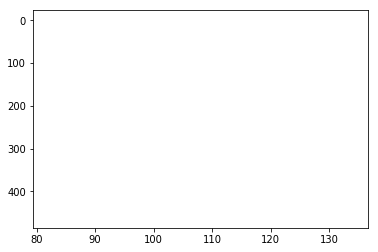